# Fuzzy C-means Clustering

## Konsep dasar fuzzy c-means clustering

FCM adalah metode unsupervised learning yang membagi data menjadi beberapa cluster dengan memungkinkan satu data masuk ke lebih dari satu cluster.

Output-nya: pusat cluster & matriks keanggotaan.

## Algoritma Fuzzy C-Means (FCM)

1. Inisialisasi Parameter

   - Tentukan jumlah cluster \( c \)
   - Tentukan eksponen fuzziness \( m \) (biasanya \( m = 2 \))
   - Inisialisasi matriks keanggotaan \( U = [u_{ij}] \) secara acak, dengan syarat:
     $$
     \sum_{j=1}^{c} u_{ij} = 1 \quad \text{untuk semua } i
     $$

2. Hitung Pusat Cluster

   Untuk setiap cluster \( j \), pusat cluster dihitung menggunakan:
   $$
   c_j = \frac{\sum_{i=1}^{N} u_{ij}^m \cdot x_i}{\sum_{i=1}^{N} u_{ij}^m}
   $$
   Di mana:
   - \( c_j \) = pusat cluster ke-\( j \)
   - \( x_i \) = data ke-\( i \)
   - \( u_{ij} \) = derajat keanggotaan data \( i \) terhadap cluster \( j \)
   - \( m \) = parameter fuzzy (semakin besar, semakin fuzzy)

3. Update Derajat Keanggotaan
   Setelah pusat cluster dihitung, update matriks keanggotaan \( U \) dengan:
   $$
   u_{ij} = \left( \sum_{k=1}^{c} \left( \frac{\|x_i - c_j\|}{\|x_i - c_k\|} \right)^{\frac{2}{m-1}} \right)^{-1}
   $$
   Di mana \( \|x_i - c_j\| \) adalah jarak Euclidean antara data \( i \) dan pusat cluster \( j \).

4. Cek Konvergensi
   - Hitung selisih antara matriks keanggotaan lama dan yang baru:
     $$
     \| U^{(t+1)} - U^{(t)} \| < \varepsilon
     $$
   - Jika terpenuhi, hentikan iterasi.
   - Jika tidak, kembali ke langkah 2.

---

Output Akhir:
- Pusat cluster \( c_j \)
- Matriks keanggotaan akhir \( U \)
- Label cluster utama untuk setiap data: pilih cluster dengan \( u_{ij} \) tertinggi.


## Contoh Manual Perhitungan dan Implementasi Fuzzy C-Means

### Data Awal (Manual)

Misalkan kita memiliki data sederhana 1 dimensi:

X = {1, 2, 3, 8, 9}

Kita akan mengelompokkan data ke dalam **2 cluster**, menggunakan Fuzzy C-Means (FCM) dengan parameter:

- Jumlah cluster: \( c = 2 \)
- Fuzzifier: \( m = 2 \)

Inisialisasi awal derajat keanggotaan \( U \) dilakukan secara acak. Contoh:

\[
U =
\begin{bmatrix}
0.8 & 0.2 \\\\
0.7 & 0.3 \\\\
0.6 & 0.4 \\\\
0.3 & 0.7 \\\\
0.2 & 0.8 \\
\end{bmatrix}
\]

Setiap baris = data.  
Setiap kolom = keanggotaan terhadap cluster (1 dan 2).

---

### Rumus-Rumus Fuzzy C-Means

1. Hitung pusat cluster:

$$
c_j = \frac{\sum_{i=1}^{N} u_{ij}^m \cdot x_i}{\sum_{i=1}^{N} u_{ij}^m}
$$

2. Update derajat keanggotaan:

$$
u_{ij} = \left( \sum_{k=1}^{C} \left( \frac{ \| x_i - c_j \| }{ \| x_i - c_k \| } \right)^{\frac{2}{m-1}} \right)^{-1}
$$

3. Fungsi Objektif:

$$
J_m = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ij}^m \cdot \|x_i - c_j\|^2
$$







##implementasi pyhton
### tampilkan nilai pusat cluster dan keanggotaan setiap iterasi dan hitung fungsi objectif setiap iterasi

In [1]:
import numpy as np

def initialize_membership(n_samples, n_clusters):
    U = np.random.dirichlet(np.ones(n_clusters), size=n_samples)
    return U

def calculate_centers(X, U, m):
    um = U ** m
    return (um.T @ X) / np.sum(um.T, axis=1)[:, None]

def update_membership(X, centers, m):
    power = 2 / (m - 1)
    dist = np.linalg.norm(X[:, None] - centers, axis=2)
    dist = np.fmax(dist, np.finfo(np.float64).eps)
    inv_dist = 1.0 / dist
    temp = inv_dist ** power
    return temp / temp.sum(axis=1, keepdims=True)

def objective_function(X, U, centers, m):
    return np.sum((U ** m) * (np.linalg.norm(X[:, None] - centers, axis=2) ** 2))

# Data 1D
X = np.array([[1], [2], [3], [8], [9]])
n_clusters = 2
m = 2
epsilon = 1e-5
max_iter = 100

U = initialize_membership(len(X), n_clusters)

for i in range(max_iter):
    centers = calculate_centers(X, U, m)
    new_U = update_membership(X, centers, m)
    obj = objective_function(X, U, centers, m)

    print(f"Iterasi {i+1}")
    print("Pusat Cluster:", centers.flatten())
    print("Keanggotaan:\n", np.round(U, 4))
    print("Fungsi Objektif:", round(obj, 5), "\n")

    if np.linalg.norm(new_U - U) < epsilon:
        break
    U = new_U

Iterasi 1
Pusat Cluster: [4.41936553 6.30911153]
Keanggotaan:
 [[0.9314 0.0686]
 [0.6056 0.3944]
 [0.5153 0.4847]
 [0.0681 0.9319]
 [0.9591 0.0409]]
Fungsi Objektif: 40.2753 

Iterasi 2
Pusat Cluster: [2.46242395 7.6296012 ]
Keanggotaan:
 [[0.7068 0.2932]
 [0.7603 0.2397]
 [0.8446 0.1554]
 [0.1823 0.8177]
 [0.2566 0.7434]]
Fungsi Objektif: 12.4769 

Iterasi 3
Pusat Cluster: [2.02672632 8.47165232]
Keanggotaan:
 [[0.9536 0.0464]
 [0.9933 0.0067]
 [0.9867 0.0133]
 [0.0045 0.9955]
 [0.0421 0.9579]]
Fungsi Objektif: 2.5724 

Iterasi 4
Pusat Cluster: [1.99200228 8.49632666]
Keanggotaan:
 [[0.9815 0.0185]
 [1.     0.    ]
 [0.9693 0.0307]
 [0.0062 0.9938]
 [0.0057 0.9943]]
Fungsi Objektif: 2.44749 

Iterasi 5
Pusat Cluster: [1.98985684 8.49675603]
Keanggotaan:
 [[0.9828 0.0172]
 [1.     0.    ]
 [0.9675 0.0325]
 [0.0068 0.9932]
 [0.0051 0.9949]]
Fungsi Objektif: 2.44723 

Iterasi 6
Pusat Cluster: [1.98971942 8.49675179]
Keanggotaan:
 [[0.9829 0.0171]
 [1.     0.    ]
 [0.9673 0.0327]
 [0.006

## implementasi fuzzy c-means untuk data iris (3 cluster) pyhton iris
Menggunakan `skfuzzy` dan data Iris dari sklearn.


In [3]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.0 MB/s eta 0:00:00


=== Pusat Cluster ===
Cluster 1: [5.00396451 3.41411318 1.48277536 0.25352818]
Cluster 2: [5.88842356 2.76088735 4.36318503 1.39691294]
Cluster 3: [6.77431261 3.05218341 5.64593019 2.05322974]

FPC (Fuzzy Partition Coefficient): 0.7833748835669098


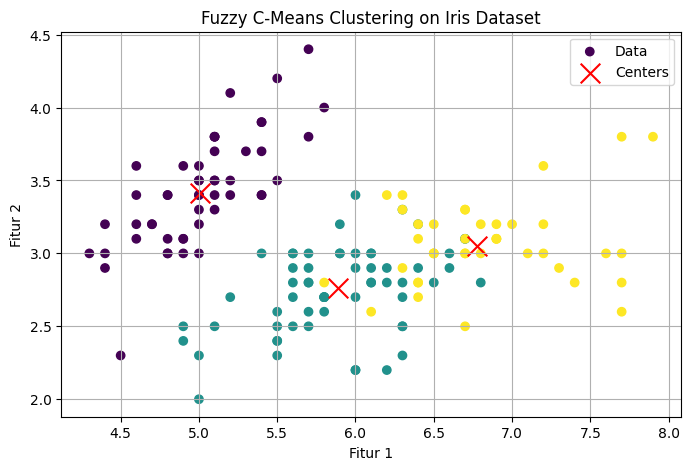

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import skfuzzy as fuzz

# Load data iris (hanya fitur)
iris = datasets.load_iris()
X = iris.data.T  # shape (features, samples)

# FCM clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Print results
print("=== Pusat Cluster ===")
for i, center in enumerate(cntr):
    print(f"Cluster {i+1}: {center}")

print("\nFPC (Fuzzy Partition Coefficient):", fpc)

# Plot
cluster_membership = np.argmax(u, axis=0)
plt.figure(figsize=(8, 5))
plt.scatter(X[0], X[1], c=cluster_membership, cmap='viridis', label="Data")
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=200, c='red', label="Centers")
plt.title("Fuzzy C-Means Clustering on Iris Dataset")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend()
plt.grid(True)
plt.show()